# Téléchargement de la base de données

In [1]:
!wget -c http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2023-10-09 11:49:00--  http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.165.13, 52.216.165.61, 54.231.193.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.165.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  20.2MB/s    in 31s     

2023-10-09 11:49:31 (18.0 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



# Importation des différents Packages

In [2]:
import numpy as np
import random
import os
import matplotlib






# Spécification de la forme des données que nous allons utiliser

In [3]:
from tensorflow.keras import layers
image_in = layers.Input(shape=(150,150,3))

Cette ligne crée un objet Input qui représente la couche d'entrée de votre modèle. shape=(150,150,3) spécifie la forme (shape) des données d'entrée. Dans ce cas, il indique que chaque exemple d'entraînement est une image de 150 pixels de largeur, 150 pixels de hauteur et 3 canaux de couleur (pour les images RGB). Le premier nombre dans le shape indique la largeur de l'image, le deuxième nombre indique la hauteur, et le troisième nombre indique le nombre de canaux de couleur (par exemple, 3 pour les images RGB, 1 pour les images en niveaux de gris).

# mise en place des filtres de convolution

## modèle de réseau de neurones convolutif (CNN)

add a first convolution

In [4]:
x = layers.Conv2D(16, 3, activation='relu')(image_in)
x = layers.MaxPooling2D(2)(x)

second convolution 32

In [5]:
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

third convolution 64

In [6]:
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Les filtres permettent au réseau d'apprendre des motifs spécifiques dans l'image.

# Convertion des données

In [7]:
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)

Les couches entièrement connectées sont utilisées pour combiner les caractéristiques apprises précédemment et effectuer des prédictions. Chaque neurone dans cette couche est connecté à tous les neurones de la couche précédente

# création d'un résultat binaire


In [8]:
output = layers.Dense(1,activation='sigmoid')(x)

# Création du model

In [9]:
from tensorflow.keras.models import Model
my_model= Model(image_in,output)

# Configure le model avec une loss fonction, le nom de l'algorithme utilisé et taille des pas et indique qu'on veut accuracy


In [10]:
from tensorflow.keras.optimizers import RMSprop
my_model.compile(loss='binary_crossentropy',optimizer=RMSprop(0.001),metrics=['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data = ImageDataGenerator(rescale=1./255)

Normamlise la l'entré des données


# Préparartion des données

In [12]:
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator

url = "http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip"


response = requests.get(url)


with open('Cat_Dog_data.zip', 'wb') as file:
    file.write(response.content)

with zipfile.ZipFile('Cat_Dog_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

train_dir = 'data/Cat_Dog_data/train'

training_dataset = training_data.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 22500 images belonging to 2 classes.


données de test

In [13]:

testing_dir = 'data/Cat_Dog_data/test'

validation_dataset = training_data.flow_from_directory(testing_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2500 images belonging to 2 classes.


 # Exécution du model

In [14]:
H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=15,validation_data=validation_dataset, validation_steps=50, verbose=2)

Epoch 1/15


<ipython-input-14-35bec48d4590>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=15,validation_data=validation_dataset, validation_steps=50, verbose=2)


100/100 - 66s - loss: 0.8272 - acc: 0.5215 - val_loss: 0.6875 - val_acc: 0.5130 - 66s/epoch - 663ms/step
Epoch 2/15
100/100 - 58s - loss: 0.6865 - acc: 0.5785 - val_loss: 0.6495 - val_acc: 0.6560 - 58s/epoch - 583ms/step
Epoch 3/15
100/100 - 60s - loss: 0.6453 - acc: 0.6330 - val_loss: 0.6715 - val_acc: 0.6270 - 60s/epoch - 598ms/step
Epoch 4/15
100/100 - 61s - loss: 0.6137 - acc: 0.6595 - val_loss: 0.5739 - val_acc: 0.7000 - 61s/epoch - 611ms/step
Epoch 5/15
100/100 - 61s - loss: 0.5888 - acc: 0.6960 - val_loss: 0.5535 - val_acc: 0.7020 - 61s/epoch - 609ms/step
Epoch 6/15
100/100 - 68s - loss: 0.5569 - acc: 0.7205 - val_loss: 0.5696 - val_acc: 0.6890 - 68s/epoch - 676ms/step
Epoch 7/15
100/100 - 62s - loss: 0.5340 - acc: 0.7315 - val_loss: 0.5999 - val_acc: 0.6960 - 62s/epoch - 618ms/step
Epoch 8/15
100/100 - 59s - loss: 0.5334 - acc: 0.7340 - val_loss: 0.5411 - val_acc: 0.7330 - 59s/epoch - 594ms/step
Epoch 9/15
100/100 - 61s - loss: 0.5259 - acc: 0.7355 - val_loss: 0.5060 - val_acc:

In [15]:
print(H.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


# Graphique

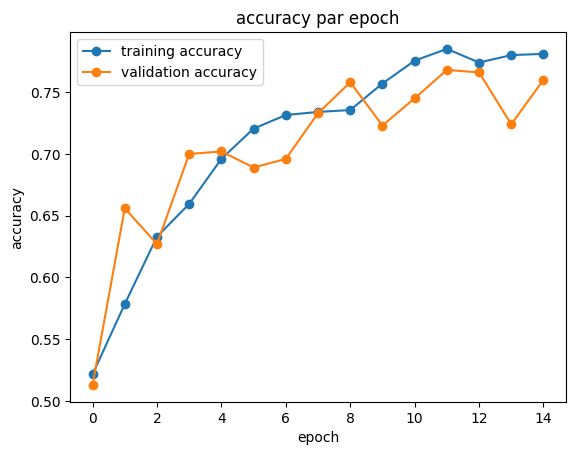

In [16]:
import matplotlib.pyplot as plt


plt.plot(H.history['acc'], label='training accuracy', marker='o')
plt.plot(H.history['val_acc'], label='validation accuracy', marker='o')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy par epoch')
plt.legend()

plt.show()


*Overfitting* : Sur les courbes d'apprentissage, l'erreur d'entraînement diminue continuellement, mais l'erreur de validation commence à augmenter après un certain point, indiquant que le modèle surajuste les données d'entraînement.
*Underfitting *: Dans ce cas, l'erreur d'entraînement reste élevée et l'erreur de validation est également élevée et ne diminue pas significativement. Les courbes d'apprentissage seront généralement proches l'une de l'autre mais à un niveau élevé.

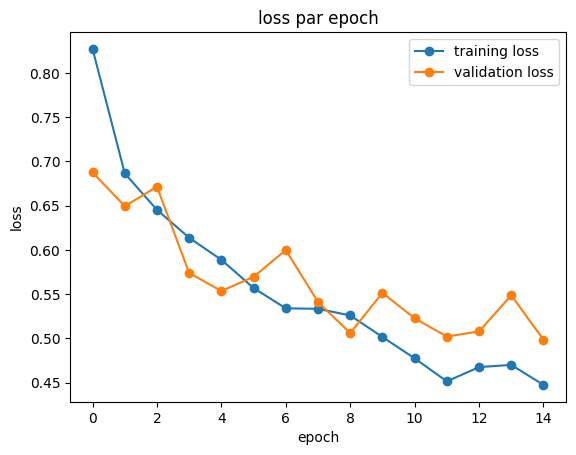

In [17]:
plt.plot(H.history['loss'], label='training loss', marker='o')
plt.plot(H.history['val_loss'], label='validation loss', marker='o')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss par epoch')
plt.legend()

plt.show()


In [18]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.5).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)

print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 18s 142ms/step
Nombre de chats : [1516]Nombre de chiens : [984]


In [19]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.8).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)

print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 18s 142ms/step
Nombre de chats : [2215]Nombre de chiens : [285]


In [20]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.999999999).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)

print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 19s 149ms/step
Nombre de chats : [2500]Nombre de chiens : [0]


125/125 [==============================] - 18s 142ms/step


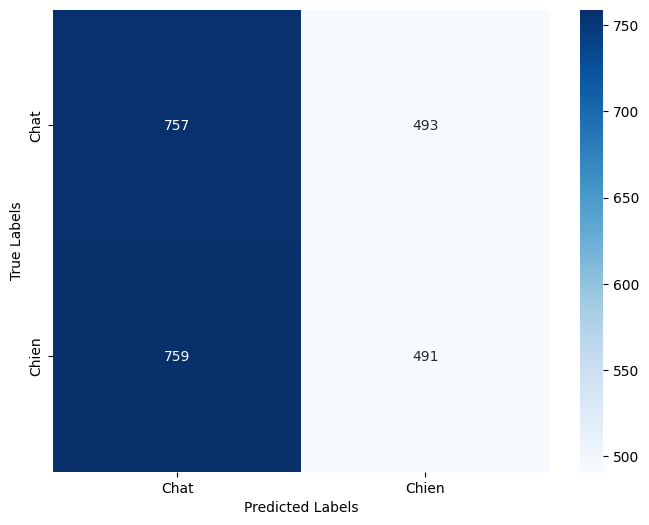

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


predictions = my_model.predict(validation_dataset)

binary_predictions = (predictions > 0.5).astype(int)

true_labels = validation_dataset.classes

cm = confusion_matrix(true_labels, binary_predictions)

class_names = ['Chat', 'Chien']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('Données réelle')
plt.show()
